## Distributions of global blood types 
This notebook is aimed at gaining insights on how blood types are distributed around the world.

According to [Cleveland Clinic](https://my.clevelandclinic.org/health/articles/21213-blood-types), Blood types lets healthcare providers to determine whether your blood is compatible with someone else’s blood. Blood bank specialists determine your blood type based on whether you have antigen A or B on your red blood cells which gives the 4 main types: A, B, AB, O. They also look for a protein called the Rh factor and classify your blood type as positive (+) and negative (-) based on its presence

<img src="https://my.clevelandclinic.org/-/scassets/images/org/health/articles/21213-blood-types" width="300" height="400">

**Data Definitions**
* Population - Whole real numbers representing no. of country's people
* Blood types (ABO) - Percentage of country's population

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt

blood_types_df = pd.read_csv('./../input/global-blood-type-distribution/bloodtypes.csv')
blood_types_df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.1,31.20,14.5,5.20,6.0,5.50,2.6,0.90
1,Algeria,43576691,40.0,30.00,15.0,4.25,6.6,2.30,1.1,0.75
2,Argentina,45479118,48.9,31.54,8.0,2.45,4.9,3.16,0.8,0.25
3,Armenia,3021324,29.0,46.30,12.0,5.60,2.0,3.70,1.0,0.40
4,Australia,25466459,38.0,32.00,12.0,4.00,7.0,6.00,2.0,1.00


In [12]:
print(blood_types_df.shape)
print(blood_types_df.isna().sum())
# Only 1 row missing
blood_types_df = blood_types_df.dropna()

(126, 10)
Country       0
Population    0
O+            0
A+            0
B+            0
AB+           0
O-            1
A-            1
B-            1
AB-           1
dtype: int64


In [13]:
blood_types_df.describe()

,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
count,1.250000e+02,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.192717e+08,40.418480,29.62144,16.349680,4.787840,3.916720,3.277200,1.334400,0.496320
std,7.124045e+08,10.003313,6.35822,7.570347,2.515139,2.531971,2.504496,0.861794,0.381944
min,3.913700e+04,25.500000,14.00000,4.720000,0.500000,0.060000,0.040000,0.010000,0.010000
25%,5.469612e+06,32.300000,25.80000,10.000000,2.900000,1.790000,1.000000,0.540000,0.150000
50%,1.209464e+07,38.200000,30.00000,15.000000,4.290000,4.000000,2.700000,1.250000,0.400000
75%,4.471214e+07,46.830000,34.40000,21.100000,6.300000,6.000000,6.000000,2.000000,0.910000
max,7.772851e+09,75.000000,46.30000,36.800000,14.700000,13.000000,8.000000,3.130000,1.200000


Not all countries are represented (67 missing) but from the above data, most people in the world have O+ type on average at 40%

## Exploring distribution of blood types in different continents

In [87]:
# Sampling populous countries in 5 different continents
top20 = blood_types_df.sort_values('Population',ascending=False).head(20)
top20

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
125,World,7772850805,37.37,27.24,22.83,6.22,2.69,2.09,1.16,0.40
21,China,1397897720,48.00,28.00,19.00,5.60,0.30,0.40,0.30,0.10
49,India,1339330514,28.00,25.80,32.00,14.70,2.03,1.36,2.00,0.48
119,United States,334998398,37.40,35.70,8.50,3.40,6.60,6.30,1.50,0.60
50,Indonesia,267026366,36.82,25.87,28.85,7.96,0.18,0.13,0.15,0.04
88,Pakistan,238181034,30.04,21.53,30.24,8.83,3.10,2.22,3.13,0.91
84,Nigeria,219463862,50.23,21.61,19.59,3.47,2.70,1.16,1.05,0.19
14,Brazil,211715973,36.00,34.00,8.00,2.50,9.00,8.00,2.00,0.50
8,Bangladesh,164098818,29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
96,Russia,145478097,46.00,31.00,9.00,2.10,6.00,4.00,1.00,0.90


In [81]:
# print(blood_types_)
samples = ['Nigeria','India', 'Germany', 'United States', 'Brazil']
samples_df = blood_types_df.loc[blood_types_df.Country.isin(samples)]
samples_df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
14,Brazil,211715973,36.00,34.00,8.00,2.50,9.00,8.00,2.00,0.50
41,Germany,80159662,35.00,37.00,9.00,4.00,6.00,6.00,2.00,1.00
49,India,1339330514,28.00,25.80,32.00,14.70,2.03,1.36,2.00,0.48
84,Nigeria,219463862,50.23,21.61,19.59,3.47,2.70,1.16,1.05,0.19
119,United States,334998398,37.40,35.70,8.50,3.40,6.60,6.30,1.50,0.60


Those who are Rh+ are better donors compared to Rh-, the best group being those from O-, A- and B- groups 

([<matplotlib.axis.XTick at 0x79ca1bfa97b0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(26, 0, '26'),
  Text(28, 0, '28')])

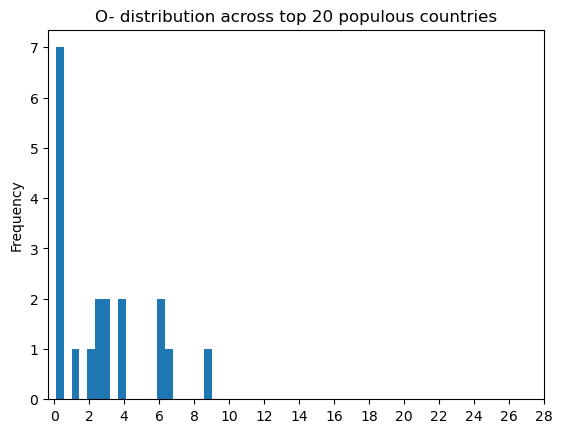

In [102]:
# Histograms of donor distriubtion
# top20 = top20.drop(125, axis=0)

top20['O-'].plot(kind='hist', bins=20)
plt.title('O- distribution across top 20 populous countries')
plt.xticks(ticks=range(0,30, 2))

<Axes: xlabel='O-', ylabel='Density'>

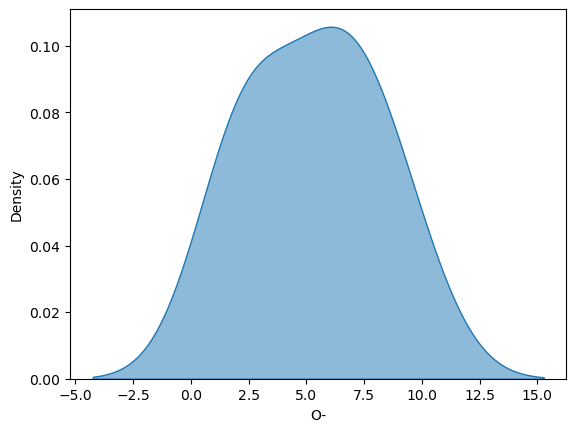

In [67]:
# Kde plot
import seaborn as sns
sns.kdeplot(data=samples_df, x='O-', fill=True, alpha=0.5, common_norm=False)